<a href="https://colab.research.google.com/github/basilsaju383/ML_project1/blob/main/credit_card_anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt



In [14]:
df = pd.read_csv('/content/sample_data/creditcard.csv')
# Drop the 'Time' column as it may not be relevant for anomaly detection
df = df.drop(['Time'], axis=1)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93176,1.236457,0.214973,0.637424,0.703850,-0.693740,-1.194417,0.028446,-0.192515,0.113517,-0.048644,...,-0.242734,-0.733475,0.183933,0.689987,0.153440,0.076317,-0.032589,0.021078,1.98,0.0
93177,1.156176,-0.319928,0.795544,0.469805,-0.838118,-0.032839,-0.695444,0.261600,0.876403,-0.086539,...,-0.013132,-0.152065,0.055522,-0.313683,0.037605,0.448817,-0.010598,0.018465,29.39,0.0
93178,-0.374903,0.013912,0.888019,-1.723059,0.112982,-1.092045,0.697306,-0.351545,-1.067566,0.537534,...,-0.436675,-0.678615,-0.027299,-0.136985,-0.404849,0.813763,0.106798,-0.027620,30.00,0.0
93179,-0.508209,-0.102169,2.060352,-1.712190,-0.000407,0.804499,0.190440,0.002202,-0.540778,-0.265089,...,0.048476,0.510975,-0.512486,-0.854798,0.710197,-0.104946,-0.092805,-0.177516,29.90,0.0


In [15]:
# Standardize the features
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['Class'] = df['Class'].astype(str) # Convert Class column to string for one-hot encoding

In [16]:
# Create one-hot encoding for the 'Class' column
df = pd.get_dummies(df, columns=['Class'], prefix=['Class'])
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount,Class_0.0,Class_1.0,Class_nan
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.188520,1,0,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.359014,1,0,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.042035,1,0,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.091184,1,0,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.108221,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93176,1.236457,0.214973,0.637424,0.703850,-0.693740,-1.194417,0.028446,-0.192515,0.113517,-0.048644,...,0.183933,0.689987,0.153440,0.076317,-0.032589,0.021078,-0.361659,1,0,0
93177,1.156176,-0.319928,0.795544,0.469805,-0.838118,-0.032839,-0.695444,0.261600,0.876403,-0.086539,...,0.055522,-0.313683,0.037605,0.448817,-0.010598,0.018465,-0.259516,1,0,0
93178,-0.374903,0.013912,0.888019,-1.723059,0.112982,-1.092045,0.697306,-0.351545,-1.067566,0.537534,...,-0.027299,-0.136985,-0.404849,0.813763,0.106798,-0.027620,-0.257243,1,0,0
93179,-0.508209,-0.102169,2.060352,-1.712190,-0.000407,0.804499,0.190440,0.002202,-0.540778,-0.265089,...,-0.512486,-0.854798,0.710197,-0.104946,-0.092805,-0.177516,-0.257616,1,0,0


In [18]:
# Split the dataset into train and test sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [21]:
# Extract features (X) and labels (y) for training and testing
X_train = train_data.drop(['Class_0.0', 'Class_1.0'], axis=1).values
y_train = train_data[['Class_0.0', 'Class_1.0']].values
X_test = test_data.drop(['Class_0.0', 'Class_1.0'], axis=1).values
y_test = test_data[['Class_0.0', 'Class_1.0']].values

In [22]:
# Build the Autoencoder Model
def build_autoencoder(input_shape):
	model = models.Sequential()
	# Encoder layer part
	model.add(layers.InputLayer(input_shape=input_shape))
	model.add(layers.Dense(64, activation='relu'))
	model.add(layers.Dense(32, activation='relu'))
	model.add(layers.Dense(16, activation='relu')) # bottleneck layer
	# Decoder layer part
	model.add(layers.Dense(32, activation='relu'))
	model.add(layers.Dense(64, activation='relu'))
	model.add(layers.Dense(input_shape, activation='tanh'))
	return model

In [23]:
input_shape = X_train.shape[1]
autoencoder = build_autoencoder(input_shape)

In [24]:
# Compile the Model
autoencoder.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

In [25]:
# Train the Autoencoder
history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=64, shuffle=False, validation_data=(X_test, X_test))

Epoch 1/10
1165/1165 [==============================] - 5s 3ms/step - loss: 0.6289 - accuracy: 0.4306 - val_loss: nan - val_accuracy: 0.5490
Epoch 2/10
1165/1165 [==============================] - 3s 2ms/step - loss: 0.5115 - accuracy: 0.5800 - val_loss: nan - val_accuracy: 0.5874
Epoch 3/10
1165/1165 [==============================] - 3s 2ms/step - loss: 0.4895 - accuracy: 0.6170 - val_loss: nan - val_accuracy: 0.6220
Epoch 4/10
1165/1165 [==============================] - 3s 2ms/step - loss: 0.4803 - accuracy: 0.6405 - val_loss: nan - val_accuracy: 0.6358
Epoch 5/10
1165/1165 [==============================] - 4s 3ms/step - loss: 0.4752 - accuracy: 0.6558 - val_loss: nan - val_accuracy: 0.6597
Epoch 6/10
1165/1165 [==============================] - 3s 2ms/step - loss: 0.4718 - accuracy: 0.6665 - val_loss: nan - val_accuracy: 0.6552
Epoch 7/10
1165/1165 [==============================] - 3s 2ms/step - loss: 0.4693 - accuracy: 0.6777 - val_loss: nan - val_accuracy: 0.6538
Epoch 8/10
11

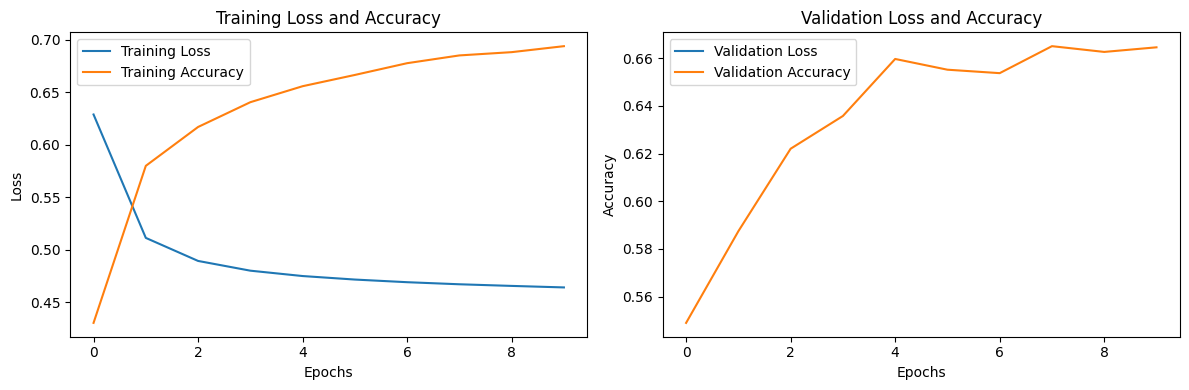

In [26]:
# Plot Loss vs. Accuracy
plt.figure(figsize=(12, 4))

# Plot Training Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Validation Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [27]:
# Evaluate the Autoencoder
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)

# Set a threshold for anomaly detection
threshold = 0.6 # You may need to adjust this threshold based on experimentation

# Classify anomalies based on the threshold
anomalies = mse > threshold

# Evaluate the Anomaly Detection Model
y_true = np.argmax(y_test, axis=1)
y_pred = anomalies.astype(int)

accuracy = accuracy_score(y_true, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')


583/583 [==============================] - 3s 4ms/step
Test Accuracy: 0.9288


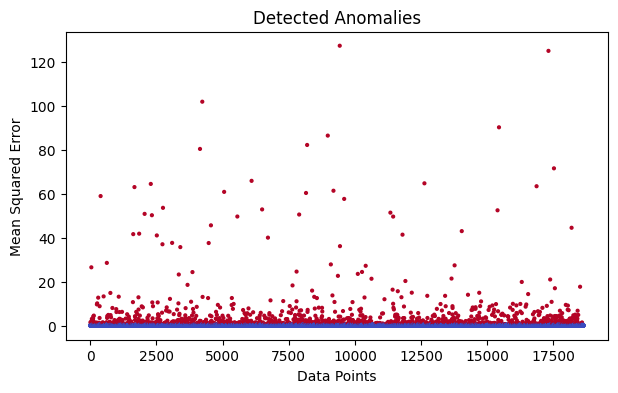

In [28]:
# Scatter plot for Anomalies
plt.figure(figsize=(7, 4))
plt.scatter(range(len(mse)), mse, c=anomalies, cmap='coolwarm', s=4)
plt.title('Detected Anomalies')
plt.xlabel('Data Points')
plt.ylabel('Mean Squared Error')
plt.show()


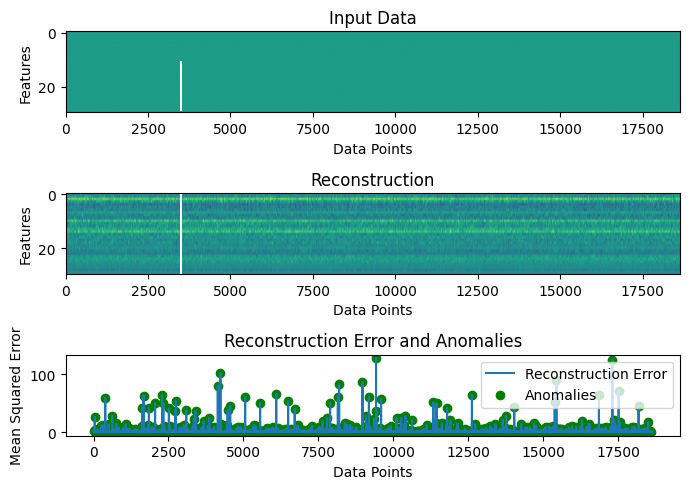

In [29]:
# Visualize Input, Reconstruction and Error
plt.figure(figsize=(7, 5))

# Plot Input Data
plt.subplot(3, 1, 1)
plt.imshow(X_test.T, aspect='auto', cmap='viridis')
plt.title('Input Data')
plt.xlabel('Data Points')
plt.ylabel('Features')

# Plot Reconstruction
plt.subplot(3, 1, 2)
plt.imshow(predictions.T, aspect='auto', cmap='viridis')
plt.title('Reconstruction')
plt.xlabel('Data Points')
plt.ylabel('Features')

# Plot Reconstruction Error
plt.subplot(3, 1, 3)
plt.plot(mse, label='Reconstruction Error')
plt.scatter(np.where(anomalies)[0], mse[anomalies], color='green', label='Anomalies')
plt.title('Reconstruction Error and Anomalies')
plt.xlabel('Data Points')
plt.ylabel('Mean Squared Error')
plt.legend()

plt.tight_layout()
plt.show()
